Utilizziamo il modello di regressione logistica disponibile nella
libreria Sci-Kit Learn per implementare velocemente un modello
di regressione logistica capace di lavorare su più classi

In [1]:
# Import librerie necessarie

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn import model_selection
import random

In [2]:
# caricamento dataset sfruttando il dataset "digits" di SciKit-Learn

digits_df = datasets.load_digits()
print('Struttura del dataset: ', dir(digits_df))
print('Dimensione dataset: ', digits_df.data.shape)
print('Il dataset contiene la rappresentazione in pixel delle immagini, \n', digits_df.data)

Struttura del dataset:  ['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
Dimensione dataset:  (1797, 64)
Il dataset contiene la rappresentazione in pixel delle immagini, 
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


Plottiamo qualche esempio nel dataset

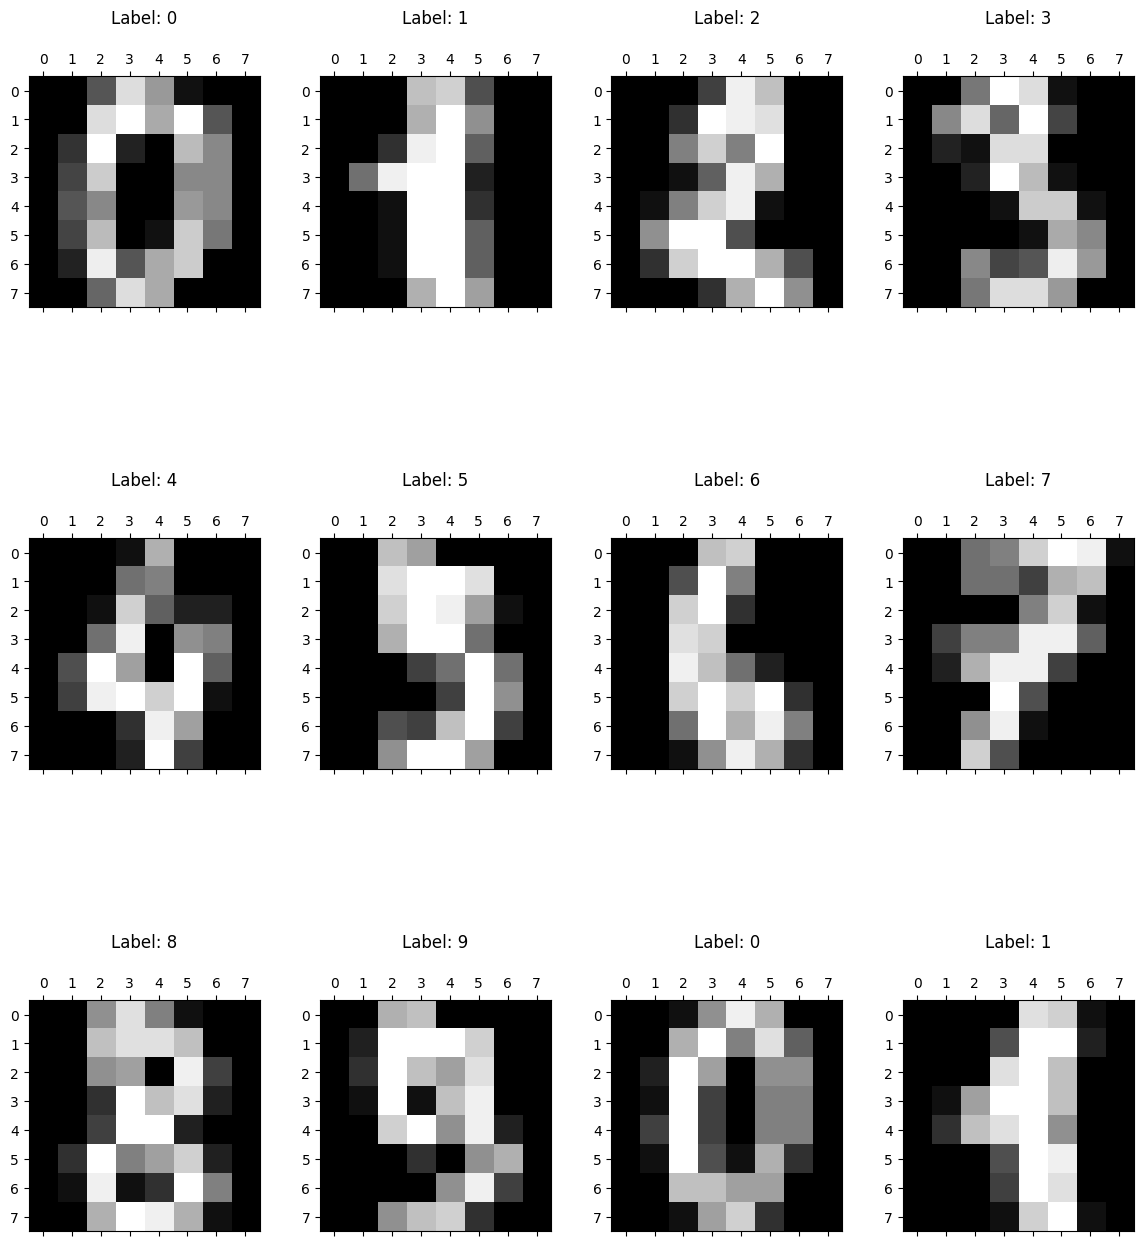

In [3]:
rows = 3
columns = 4
fig, ax = plt.subplots(rows, columns, figsize=(15, 15))

plt.gray()
for i in range(rows):
    for j in range(columns):
        index = i * columns + j
        ax[i][j].set_title('Label: %s\n' % digits_df.target[index])
        ax[i][j].matshow(digits_df.images[index])

plt.subplots_adjust(wspace=0.01, hspace=1)
plt.show()

In [4]:
# creazione del dataset di esempi X e del vettore di etichette y

X = digits_df.data / 16
y = digits_df.target

In [5]:
# suddivisione in dataset di addestramento e di test

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

print('Dimensioni dei dataset:')
print('X_train = ', X_train.shape)
print('X_test  = ', X_test.shape)
print('y_train = ', y_train.shape)
print('y_train = ', y_test.shape)

Dimensioni dei dataset:
X_train =  (1437, 64)
X_test  =  (360, 64)
y_train =  (1437,)
y_train =  (360,)


In [6]:
# modello di regressione logistica
lm = linear_model.LogisticRegression(max_iter=15000)

lm.fit(X_train, y_train)

LogisticRegression(max_iter=15000)

Valore predetto : [3]
Il valore dal dataset di test è 3


<Figure size 640x480 with 0 Axes>

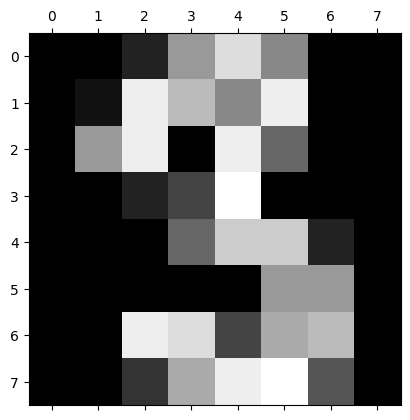

In [7]:
# testing del modello

id = random.randint(0, X_test.shape[0] )

plt.gray()
plt.matshow( X_test.reshape(-1, 8, 8)[id])

print('Valore predetto :', lm.predict([X_test[id]]))

print('Il valore dal dataset di test è %s' % (y_test[id]))

In [8]:
# valutazione del modello
lm.score(X_test, y_test)

0.9805555555555555

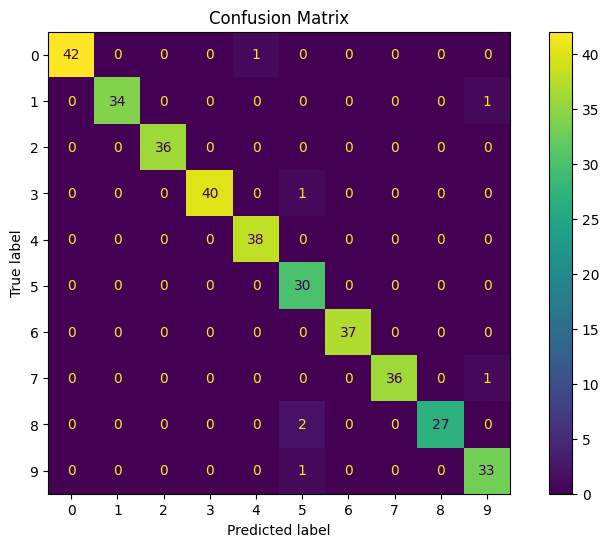

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

# Predict on test data
y_pred = lm.predict(X_test)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')

cm = metrics.confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits_df.target_names)
disp.plot(ax=ax)

plt.show()
